In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

# Нормальное распределение

Вот так можно сгенерировать выборку из нормально распределённой случайной величины с параметрами $\mu=2.0$ и $\sigma=0.5$:

In [2]:
mu = 2.0
sigma = 0.5

# зададим нормально распределенную случайную величину
norm_rv = sts.norm(loc=mu, scale=sigma)

# сгенерируем 10 значений
norm_rv.rvs(size=10)

array([2.53643544, 1.94712296, 1.65046809, 2.47312853, 1.07939315,
       1.86924823, 2.51679203, 2.37668052, 1.21024577, 1.56938908])

Параметр ```loc``` задаёт $\mu$, ```scale``` — среднеквадратичное отклонение $\sigma$, ```size``` — размер выборки. Имя параметра ```size``` при вызове функции ```rvs``` можно не писать.

Следующая функция возвращает значение функции распределения нормальной случайной величины в точке, соответствующей её аргументу:

In [18]:
norm_rv.cdf(1)

0.022750131948179195

Построим график функции распределения:

Text(0.5, 0, '$x$')

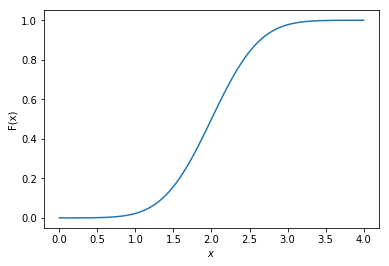

In [26]:
x = np.linspace(0,4,100)
cdf = norm_rv.cdf(x) # функция может принимать и вектор (x)
plt.plot(x, cdf)
plt.ylabel('F(x)')
plt.xlabel('$x$')

А так можно вычислить значение функции плотности вероятности нормального распределения в заданной точке:

In [28]:
print('функция распределения нормальной случайной величины в точке:\n', norm_rv.pdf(2))
print('функция плотности вероятности нормального распределения в точке:\n', norm_rv.cdf(2))

функция распределения нормальной случайной величины в точке:
 0.7978845608028654
функция плотности вероятности нормального распределения в точке:
 0.5


Построим график функции плотности вероятности:

Text(0.5, 0, '$x$')

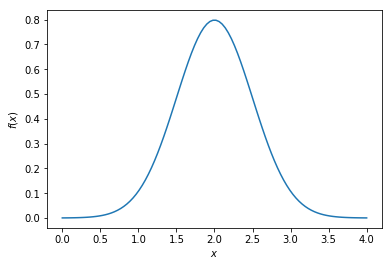

In [19]:
x = np.linspace(0,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Равномерное распределение на отрезке

Вот так можно сгенерировать выборку из случайной величины, имеющей равномерное распределение на отрезке $[a,b]$:

In [24]:
a = 1
b = 4

# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(10)

array([2.12788452, 3.8360218 , 1.48027307, 3.74262558, 1.90489436,
       2.75688012, 1.53970947, 1.52334569, 1.77602315, 2.70918003])

А так — вычислять значения функций распределения и плотностей:

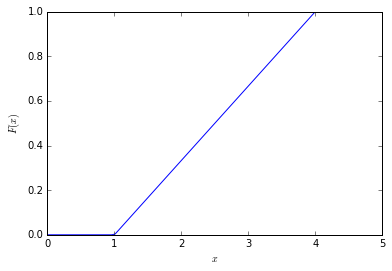

In [8]:
x = np.linspace(0,5,100)
cdf = uniform_rv.cdf(x)
plt.plot(x, cdf)

plt.ylabel('$F(x)$')
plt.xlabel('$x$')

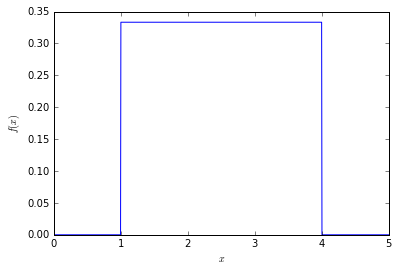

In [9]:
x = np.linspace(0,5,1000)
pdf = uniform_rv.pdf(x)
plt.plot(x, pdf)

plt.ylabel('$f(x)$')
plt.xlabel('$x$')

# Распределение Бернулли

Генерация выборок из распределения Бернулли с заданным параметром $p$:

In [10]:
bernoulli_rv = sts.bernoulli(0.7)

bernoulli_rv.rvs(10)

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1])

# Биномиальное распределение

Генерация выборок из биномиального распределения:

In [20]:
binomial_rv = sts.binom(20, 0.7)
binomial_rv.rvs(10)

array([14, 13, 17, 12, 13, 17, 13, 12, 17, 15])

Первый аргумент функции binom — значение параметра $n$, второй — параметра $p$.

Функция распределения:

Text(0.5, 0, '$x$')

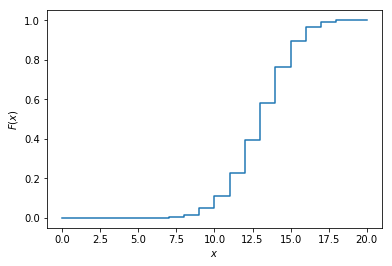

In [21]:
x = np.linspace(0,20,21)
cdf = binomial_rv.cdf(x)
plt.step(x, cdf)

plt.ylabel('$F(x)$')
plt.xlabel('$x$')

Функция вероятности ```pmf``` для дискретных случайных величин заменяет функцию плотности ```pdf```:

Text(0.5, 0, '$x$')

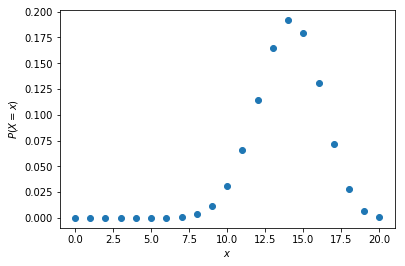

In [22]:
x = np.linspace(0,20,21)
pmf = binomial_rv.pmf(x)
plt.plot(x, pmf, 'o')

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

In [23]:
pmf

array([3.48678440e-11, 1.62716605e-09, 3.60688475e-08, 5.04963865e-07,
       5.00755833e-06, 3.73897689e-05, 2.18106985e-04, 1.01783260e-03,
       3.85928193e-03, 1.20066549e-02, 3.08170809e-02, 6.53695655e-02,
       1.14396740e-01, 1.64261985e-01, 1.91638983e-01, 1.78863051e-01,
       1.30420974e-01, 7.16036722e-02, 2.78458725e-02, 6.83933711e-03,
       7.97922663e-04])

Посмотрим, как ведут себя биномиально распределенные величины при разных значениях параметров:

Text(0.5, 0, '$x$')

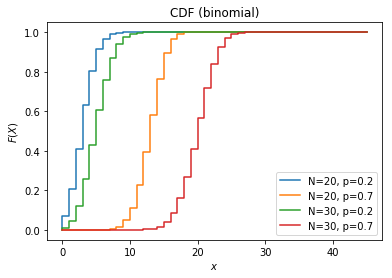

In [49]:
x = np.linspace(0,45,46)
for N in [20, 30]:
    for p in [0.2, 0.7]:
        rv = sts.binom(N, p)
        cdf = rv.cdf(x)
        plt.step(x, cdf, label="N=%s, p=%s" % (N,p))
plt.legend()
plt.title("CDF (binomial)")

plt.ylabel('$F(X)$')
plt.xlabel('$x$')

Text(0.5, 0, '$x$')

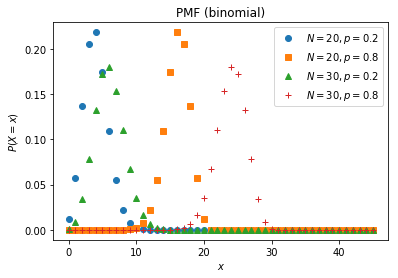

In [50]:
x = np.linspace(0,45,46)
symbols = iter(['o', 's', '^', '+'])
for N in [20, 30]:
    for p in [0.2, 0.8]:
        rv = sts.binom(N, p)
        pmf = rv.pmf(x)
        plt.plot(x, pmf, next(symbols), label="$N=%s, p=%s$" % (N,p))
plt.legend()
plt.title("PMF (binomial)")

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

In [51]:
symbols

# Распределение Пуассона

Генерация выборок из распределения Пуассона с параметром $\lambda$:

In [15]:
poisson_rv = sts.poisson(3)
poisson_rv.rvs(10)
cdf = poisson_rv.cdf(0)
print('cdf:', cdf)
pmf = poisson_rv.pmf(0)
print('pmf:', round(pmf, 2))

cdf: 0.04978706836786395
pmf: 0.05


In [67]:
rv = sts.poisson(3)
z = 0
for i in range(5):
    pmf = poisson_rv.pmf(i)
    z += pmf
z = 1 - z
print(round(z, 2))
    

0.18


In [72]:
cdf = rv.cdf(4)
1 - cdf

0.1847367554762278

In [64]:
z = 0
for l in [1, 5, 10, 15]:
    rv = sts.poisson(l)
    cdf = rv.cdf(3)
    print(cdf)
    z += cdf
print(z)

0.9810118431238462
0.2650259152973616
0.010336050675925726
0.00021137850346676174
1.2565851876006002


Text(0.5, 0, '$x$')

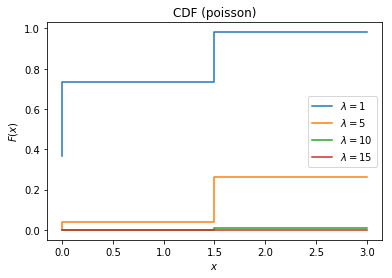

In [4]:
x = np.linspace(0,3,3)
for l in [1, 5, 10, 15]:
    rv = sts.poisson(l)
    cdf = rv.cdf(x)
    plt.step(x, cdf, label="$\lambda=%s$" % l)
plt.legend()
plt.title("CDF (poisson)")

plt.ylabel('$F(x)$')
plt.xlabel('$x$')

Text(0.5, 0, '$x$')

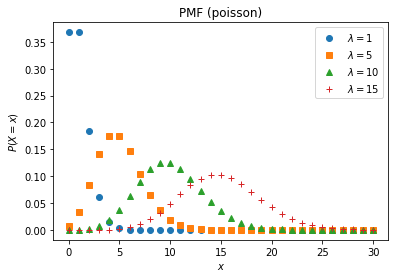

In [39]:
x = np.linspace(0,30,31)

symbols = iter(['o', 's', '^', '+'])
for l in [1, 5, 10, 15]:
    rv = sts.poisson(l)
    pmf = rv.pmf(x)
    plt.plot(x, pmf, next(symbols), label="$\lambda=%s$" % l)
plt.legend()
plt.title("PMF (poisson)")

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

# Дискретное распределение общего вида

Чтобы сгенерировать дискретную случайную величину общего вида, нужно задать множество её значений и соответствующих вероятностей и использовать функцию ```numpy.random.choice```:

In [19]:
elements = np.array([1, 5, 12])
probabilities = [0.05, 0.7, 0.25]
np.random.choice(elements, 10, p=probabilities)

array([ 5, 12, 12, 12,  5, 12,  5,  5,  5,  5])

# Другие распределения

Существует большое количество других стандартных семейств распределений, многие из которых также можно генерировать в Питоне. 
Например, распределение хи-квадрат $\chi^2_k$, имеющее натуральный параметр $k$, который называется числом степеней свободы:

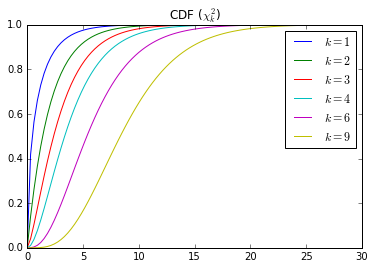

In [20]:
x = np.linspace(0,30,100)
for k in [1, 2, 3, 4, 6, 9]:
    rv = sts.chi2(k)
    cdf = rv.cdf(x)
    plt.plot(x, cdf, label="$k=%s$" % k)
plt.legend()
plt.title("CDF ($\chi^2_k$)")

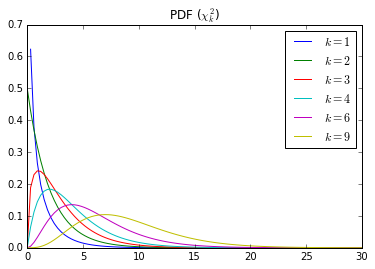

In [21]:
x = np.linspace(0,30,100)
for k in [1, 2, 3, 4, 6, 9]:
    rv = sts.chi2(k)
    pdf = rv.pdf(x)
    plt.plot(x, pdf, label="$k=%s$" % k)
plt.legend()
plt.title("PDF ($\chi^2_k$)")

Полный список функций SciPy для работы со всеми распределениями можно найти тут: http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html